In [96]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt
import scipy.sparse as sp


# Tải dữ liệu data X và y đã được xử lý thành ma trận
labels = np.load('D:/Document/Machine_Learning/CS3/label.npy') 
features = sp.load_npz('D:/Document/Machine_Learning/CS3/tfidf.npz')

def add_bias(features, labels):
    '''
    features là ma trận N*X với N là số datapoint, X là số term trong dictionary
    labels là ma trận N*1 với N là số datapoint
    
    Hàm trả về ma trận features(sau khi đã thêm 1 cột bias giá trị 1 cho tất cả các phần tử) và labels
    '''
    # Thêm cột giá trị bias cho dữ liệu
    labels_final = sp.csr_matrix(labels, shape = (1, len(labels)))
    matrix_ones = sp.csc_matrix((26709,1),dtype=np.float)
    matrix_ones[:]=1
    matrix_final_features= sp.csc_matrix(sp.hstack((features,matrix_ones)))
    return matrix_final_features, labels_final

# chia Train và test
matrix_final_features, labels_final = add_bias(features, labels)
X_Train = matrix_final_features[:20000]
X_test = matrix_final_features[20000:]
y_Train = labels_final.T[:20000]
y_test = labels_final.T[20000:]

# Hàm Sigmoid

In [97]:
def sigmoid(z):
    # hàm sigmoid
    '''
    z là model đầu ra Linear Regression
    np.exp là e mũ
    Hàm trả về sigmoid của z
    
    '''
    return 1/(1+np.exp(-z))

# Hàm Cost Function

In [98]:
def Cost_Function(w, y, X):
    '''
    w là ma trận bộ tham số có shape bằng (1,X.shape[1])
    X là features
    y là y labels
    Hàm trả về cost tương ứng bộ tham số w
    
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
    
    cost = -np.sum((y*(np.log(z)) + (1-y)*np.log(1-z)))
    
    return cost

# Hàm tính đạo hàm 

In [99]:
def Derivative(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về giá trị đạo hàm của Cost theo từng w
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
#     print('z',z.shape, type(z))
#     print('y',y.shape, type(y))
#     print('X',X.shape, type(X))
    der = (z-y).T
    
    X = X.T
#     print(X.shape, type(X))
    der = sp.csr_matrix(der, shape = (1,der.shape[1]))
    der = der.T
#     print(der.shape, type(der))
    
    return X.dot(der)

# Khởi tạo Learning Rate

In [100]:
# Khởi tạo learning rate
alpha = 0.0005
gama = .9


# Prediction

In [101]:
def Prediction(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về ma trận N*1 với N là số datapoint
    '''
     # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    for i in range(z.shape[0]):
        if(z[i]>0.5):
            z[i] = 1
        else: z[i] = 0
    print(z)
    print(y.toarray())
    return z

In [102]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))

# BGD 

epoch =  0 cost =  14014.402212554527
epoch =  500 cost =  11762.46605367905
epoch =  1000 cost =  8412.683661565852
epoch =  1500 cost =  7584.789066369553
epoch =  2000 cost =  6974.079829417187
epoch =  2500 cost =  6492.887743347217
epoch =  3000 cost =  6097.5817318251065
epoch =  3500 cost =  5763.362281096256
epoch =  4000 cost =  5474.798846740503
epoch =  4500 cost =  5221.640821833186
epoch =  5000 cost =  4996.73268670245
epoch =  5500 cost =  4794.881598632825
epoch =  6000 cost =  4612.199262343891
epoch =  6500 cost =  4445.698259100787
epoch =  7000 cost =  4293.033311331126
epoch =  7500 cost =  4152.329251590105
epoch =  8000 cost =  4022.0630326205846
epoch =  8500 cost =  3900.9806150455934
epoch =  9000 cost =  3788.0370508266637
epoch =  9500 cost =  3682.3524020865275
Cost trên tập test_data: 2866.4630237837146


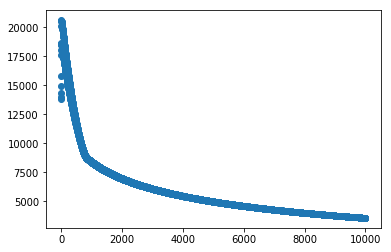

In [103]:
# list chứa tất cả mse
all_Cost = []

# Khởi tạo số vòng lặp
num = 10000

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    w = w - alpha*der 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))

# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [112]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
#v
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(v, shape = (len(v),1))

# Momentum BGD

epoch =  0 cost =  14014.402212554527
epoch =  500 cost =  5004.65286829272
epoch =  1000 cost =  3582.536599735322
epoch =  1500 cost =  2840.0354354627443
epoch =  2000 cost =  2368.1246710881674
Cost trên tập test_data: 3007.8535694919465


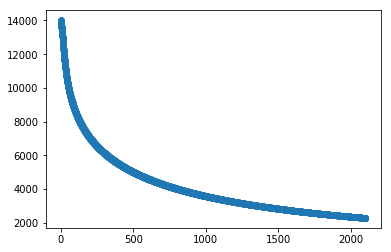

In [113]:
# list chứa tất cả mse
all_Cost = []
# Khởi tạo learning rate

# Khởi tạo số vòng lặp
num = 2100

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)

    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    v = gama*v + alpha*der
    w = w - v 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
        
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [123]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
#v
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(v, shape = (len(v),1))

# NAG

epoch =  0 cost =  14014.402212554527
epoch =  50 cost =  15399.124041458346
epoch =  100 cost =  10765.249787301358
epoch =  150 cost =  8501.80207421502
epoch =  200 cost =  7199.090481154521
epoch =  250 cost =  6382.433083839283
epoch =  300 cost =  5860.468192965372
epoch =  350 cost =  5528.81413812275
epoch =  400 cost =  5268.817405366706
epoch =  450 cost =  5041.401735726313
epoch =  500 cost =  4838.230380294507
epoch =  550 cost =  4654.50282560288
epoch =  600 cost =  4486.944254053556
epoch =  650 cost =  4333.138846522448
epoch =  700 cost =  4191.215078990366
epoch =  750 cost =  4059.6749871461698
epoch =  800 cost =  3937.291846823535
epoch =  850 cost =  3823.0439972138547
epoch =  900 cost =  3716.069426962962
epoch =  950 cost =  3615.633162755848
Cost trên tập test_data: 2870.6247651678423


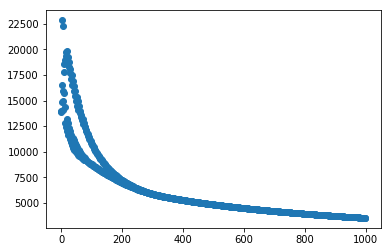

In [124]:
# list chứa tất cả mse
all_Cost = []
# Khởi tạo learning rate

# Khởi tạo số vòng lặp
num = 1000

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    
    der = Derivative(w-gama*v, y_Train, X_Train)
    v = gama*v + alpha*der
    w = w - v 
    
    if i % 50 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [125]:
# Lưu bộ tham số xuống file npz
sp.save_npz('D:/Document/Machine_Learning/CS3/w.npz', w)

In [126]:
y_pred = Prediction(w, y_test, X_test)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Accuracy

In [127]:
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score(y_pred, y_test.toarray()))

Accuracy =  0.80175883142048


In [128]:
def Accuracy(y_pred, y_test):
    
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_test[i]:
            count += 1
    return count/y_pred.shape[0]

print('Accuracy = ',Accuracy(y_pred, y_test.toarray()))

Accuracy =  0.80175883142048


In [136]:
# tính tổng số điểm dữ liệu dự đoán có nhãn là 1 đúng
def find_TP(y_pred, y_test):
    count = 0
    Positive = np.multiply(y_pred, y_test)
    return np.count_nonzero(Positive)
TP = find_TP(y_pred, y_test.toarray())

# tính tổng số điểm dữ liệu dự đoán nhãn là 1 nhưng sai
def find_FP(y_pred, y_test):
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == 1:
            if y_test[i] == 0:
                count += 1
    return count
FP = find_FP(y_pred, y_test.toarray())

# tính tống số điểm dữ liệu có nhãn là 1 trong tập test
def find_P(y_pred, y_test):
    return np.count_nonzero(y_test)
P = find_P(y_pred, y_test.toarray())

print('TP:', TP)
print('FP:', FP)
print('P:', P)

TP: 2146
FP: 546
P: 2930


# Precision

In [130]:
from sklearn.metrics import precision_score
print("Precision score =",precision_score(y_pred, y_test.toarray()))

Precision score = 0.7324232081911263


In [131]:
def Precision(TP, FP):
    return TP/(TP+FP)
Precision = Precision(TP, FP)
print("Precision score =", Precision)

Precision score = 0.7971768202080238


# Recall

In [132]:
from sklearn.metrics import recall_score
print("Recall score:",recall_score(y_pred, y_test.toarray()))


Recall score: 0.7971768202080238


In [133]:
def Recall(TP, P):
    return TP/P
Recall = Recall(TP, P)
print("Recall score:",Recall)

Recall score: 0.7324232081911263


# F1_score

In [134]:
from sklearn.metrics import f1_score
print("F1_score:",f1_score(y_pred, y_test.toarray()))

F1_score: 0.7634293845606547


In [135]:
def F1_Score(Precision, Recall):
    return (2*(Precision*Recall)/(Precision+Recall))

print("F1_score:",F1_Score(Precision, Recall))

F1_score: 0.7634293845606547
